In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


# Loading data

In [2]:
df = pd.read_csv('sdn_ml.csv')

In [3]:
df.index = df['timestamp']
df.drop('timestamp', axis=1, inplace=True)

In [4]:
df

,hour,minut,second,day,month,delay,sensor_id,temperature,label
timestamp,,,,,,,,,
2004-03-31 02:58:45,2,58,45,31,3,0.0,3,122.153,0
2004-02-28 00:58:46,0,58,46,28,2,0.0,3,20.204,0
2004-03-30 16:04:46,16,4,46,30,3,0.0,3,122.153,0
2004-03-30 14:43:05,14,43,5,30,3,0.0,3,122.153,0
2004-03-30 16:06:06,16,6,6,30,3,0.0,3,122.153,0
...,...,...,...,...,...,...,...,...,...
2004-03-21 19:02:56,19,2,56,21,3,200000.0,3,212.134,0
2004-03-21 19:03:27,19,3,27,21,3,200000.0,3,211.938,0
2004-03-21 19:04:05,19,4,5,21,3,400000.0,3,21.184,1


# general graphic


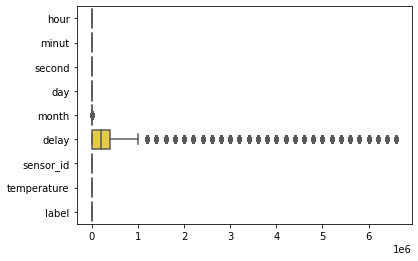

In [5]:
 ax = sns.boxplot(data=df, orient="h", palette="Set2")

# Normalized Graphic 

In [6]:
from sklearn.preprocessing import StandardScaler

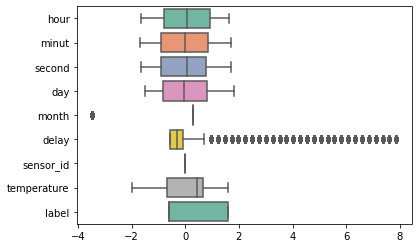

In [7]:
scaler = StandardScaler().fit(df)
norm_subset = pd.DataFrame(scaler.transform(df), columns = df.columns)
ax = sns.boxplot(data=norm_subset, orient="h", palette="Set2")

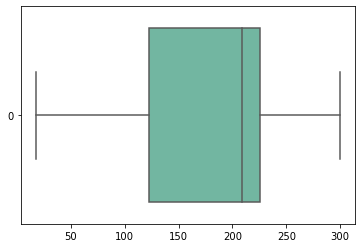

In [8]:
ax = sns.boxplot(data=df['temperature'], orient="h", palette="Set2")

Text(0.5, 1.0, 'Attribute: delay')

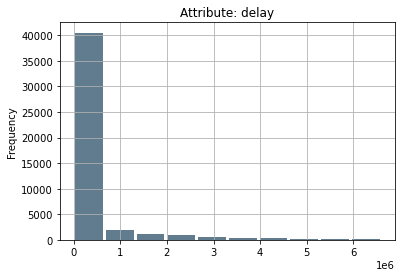

In [9]:
df["delay"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: delay")

Text(0.5, 1.0, 'Attribute: delay')

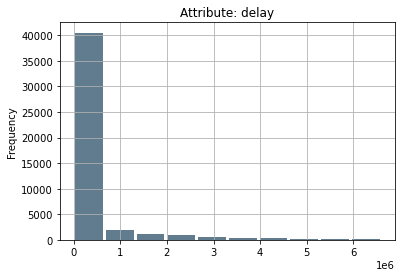

In [10]:
df["delay"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: delay")

In [11]:
df.corr()

,hour,minut,second,day,month,delay,sensor_id,temperature,label
hour,1.000000,0.003224,0.007482,-0.003334,-0.022434,-0.037421,NaN,0.065098,0.022100
minut,0.003224,1.000000,0.000199,-0.000385,-0.001290,-0.008051,NaN,-0.005513,-0.004423
second,0.007482,0.000199,1.000000,0.100583,-0.104834,-0.025039,NaN,-0.019348,0.003761
day,-0.003334,-0.000385,0.100583,1.000000,-0.447918,0.045779,NaN,-0.179392,-0.009663
month,-0.022434,-0.001290,-0.104834,-0.447918,1.000000,0.077549,NaN,0.037678,-0.022783
delay,-0.037421,-0.008051,-0.025039,0.045779,0.077549,1.000000,NaN,-0.010420,0.054601
sensor_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,0.065098,-0.005513,-0.019348,-0.179392,0.037678,-0.010420,NaN,1.000000,0.002185
label,0.022100,-0.004423,0.003761,-0.009663,-0.022783,0.054601,NaN,0.002185,1.000000


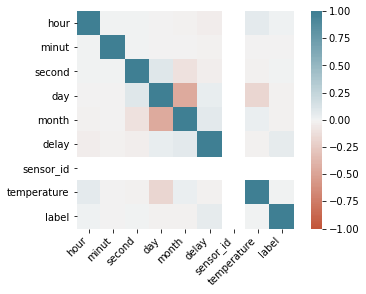

In [12]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

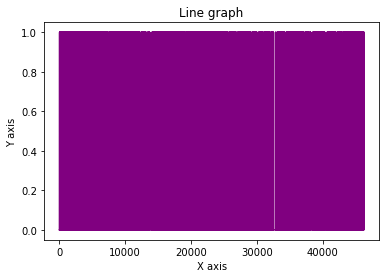

In [22]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(df.label)), df.label, color ="purple")  
plt.show()

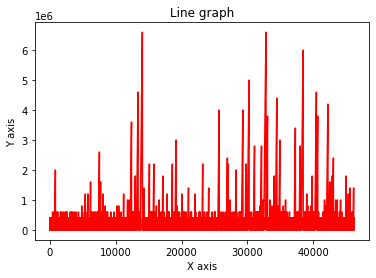

In [13]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(df.delay)), df.delay, color ="red")  
plt.show()

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
f_columns = ['delay','temperature']

f_transformer = RobustScaler()
lb_transformer = RobustScaler()

f_transformer = f_transformer.fit(df[f_columns].to_numpy())
df.loc[:,f_columns] = f_transformer.transform(df[f_columns].to_numpy())

lb_transformer = lb_transformer.fit(df[['label']])
df['label'] = lb_transformer.transform(df[['label']])

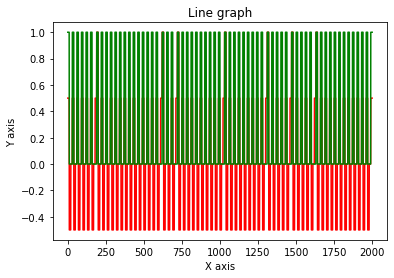

In [16]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(df.delay.iloc[1000:3000])), df.delay.iloc[1000:3000], color ="red")  
plt.plot(np.arange(len(df.label.iloc[1000:3000])), df.label.iloc[1000:3000], color ="green") 
plt.show()

In [17]:
df[df.label==1]

,hour,minut,second,day,month,delay,sensor_id,temperature,label
timestamp,,,,,,,,,
2004-02-28 01:09:46,1,9,46,28,2,0.5,3,-1.824814,1.0
2004-02-28 01:10:46,1,10,46,28,2,0.5,3,-0.142699,1.0
2004-02-28 01:11:46,1,11,46,28,2,0.5,3,-0.146479,1.0
2004-02-28 01:12:16,1,12,16,28,2,0.5,3,-1.825286,1.0
2004-02-28 01:12:46,1,12,46,28,2,0.5,3,-1.825286,1.0
...,...,...,...,...,...,...,...,...,...
2004-03-21 18:44:59,18,44,59,21,3,0.5,3,0.042526,1.0
2004-03-21 18:45:25,18,45,25,21,3,0.5,3,0.042526,1.0
2004-03-21 19:04:05,19,4,5,21,3,0.5,3,-1.807331,1.0


In [18]:
np.argsort(df[df.label==1].iloc[:,8])

timestamp
2004-02-28 01:09:46        0
2004-02-28 01:10:46     8555
2004-02-28 01:11:46     8556
2004-02-28 01:12:16     8557
2004-02-28 01:12:46     8558
                       ...  
2004-03-21 18:44:59     4285
2004-03-21 18:45:25     4286
2004-03-21 19:04:05     4287
2004-03-21 19:04:39     4277
2004-03-21 19:05:14    12842
Name: label, Length: 12843, dtype: int64

In [19]:
df[df.label==1].iloc[0,8]

1.0